In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [2]:
#read the dataset
df = pd.read_csv("./dataset/weather_forecast.csv")
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
#Encoding the strings to Numericals
outlook_at=LabelEncoder()
Temp_at=LabelEncoder()
Hum_at=LabelEncoder()
win_at=LabelEncoder()

In [4]:
#Dropping the target variable and make it is as newframe
inputs=df.drop('Play',axis='columns')
target=df['Play']
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [5]:
#Creating the new dataframe
inputs['outlook_n']= outlook_at.fit_transform(inputs['Outlook'])
inputs['Temp_n']= outlook_at.fit_transform(inputs['Temperature'])
inputs['Hum_n']= outlook_at.fit_transform(inputs['Humidity'])
inputs['win_n']= outlook_at.fit_transform(inputs['Windy'])
inputs

,Outlook,Temperature,Humidity,Windy,outlook_n,Temp_n,Hum_n,win_n
0,Sunny,Hot,High,Weak,2,1,0,1
1,Sunny,Hot,High,Strong,2,1,0,0
2,Overcast,Hot,High,Weak,0,1,0,1
3,Rain,Mild,High,Weak,1,2,0,1
4,Rain,Cool,Normal,Weak,1,0,1,1
5,Rain,Cool,Normal,Strong,1,0,1,0
6,Overcast,Cool,Normal,Strong,0,0,1,0
7,Sunny,Mild,High,Weak,2,2,0,1
8,Sunny,Cool,Normal,Weak,2,0,1,1
9,Rain,Mild,Normal,Weak,1,2,1,1


In [6]:
#Dropping the string values
inputs_n=inputs.drop(['Outlook','Temperature','Humidity','Windy'],axis='columns')
inputs_n

,outlook_n,Temp_n,Hum_n,win_n
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [7]:
inputs['Outlook'].unique()
inputs_n['outlook_n'].unique()

array([2, 0, 1])

In [8]:
#Applying the Gaussian naivebayes
classifier = GaussianNB()
classifier.fit(inputs_n,target)


GaussianNB()

In [9]:
classifier.score(inputs_n,target)

0.9285714285714286

In [10]:
classifier.predict([[2,1,0,1]])


array(['No'], dtype='<U3')

In [11]:
#save the model
import pickle
pickle.dump(classifier,open('weather.pkl','wb'))
model=pickle.load(open('weather.pkl','rb'))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target , test_size = 0.20)
y_pred = classifier.predict(X_test)


In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
ac

1.0

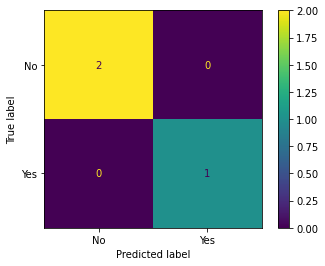

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  
plt.show()